# Filled Julia sets

MCS 275 Spring 2022 Lecture 27 - David Dumas

## Orbit related functions

In [2]:
# this is the one whose filled Julia set I want to draw in this notebook
def g(z):
    return z*z-1

# we discussed this one in the slides
def f(z):
    return z*z

In [3]:
def orbit(func,a,n):
    """
    Takes a function `func` of one paramater, and a starting
    value `a`.  Returns a list of length `n+1` consisting of
    [a, f(a), f(f(a)), ... , f^n(a)]
    """
    L = [a]
    for _ in range(n):
        # apply f to the last element computed
        # and append the result
        L.append( func(L[-1]) )
    return L

In [4]:
# try orbit of 1.5 under z^2-1
# and 2 under z^2-1

orbit(f,2,5)

[2, 4, 16, 256, 65536, 4294967296]

In [5]:
orbit(f,1/2,5)

[0.5, 0.25, 0.0625, 0.00390625, 1.52587890625e-05, 2.3283064365386963e-10]

In [6]:
orbit(g,2,10)
# a=2 is not in K_g

[2,
 3,
 8,
 63,
 3968,
 15745023,
 247905749270528,
 61457260521381894004129398783,
 3776994870793005510047522464634252677140721938309041881088,
 14265690253996672387291309349232388828298289458234016200317876247121873778287073518355813134107244701354409532063743,
 203509918422975643131625101557493482417516581321177887486174612349689723637228095885608636916042736102424433936617827686729959884103612889121780011527849662844136145473332830301242513425767433130492258922182178369327277600615170048]

In [8]:
orbit(g,1.5,30)
# a=1.5 seems to be in K_g

[1.5,
 1.25,
 0.5625,
 -0.68359375,
 -0.5326995849609375,
 -0.7162311521824449,
 -0.4870129366434074,
 -0.7628183995419644,
 -0.418108089320236,
 -0.8251856256449815,
 -0.31906868322890036,
 -0.8981951753825757,
 -0.19324542691946411,
 -0.962656204974714,
 -0.07329303102368134,
 -0.9946281316033617,
 -0.010714879823205736,
 -0.9998851913503742,
 -0.00022960411822547933,
 -0.9999999472819489,
 -1.0543609951785271e-07,
 -0.9999999999999889,
 -2.220446049250313e-14,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0]

In [9]:
# 0.5 + 0.5i is written as 0.5+0.5j in Python
orbit(g,0.5+0.5j,10)
# 0.5+0.5j is not in K_g

[(0.5+0.5j),
 (-1+0.5j),
 (-0.25-1j),
 (-1.9375+0.5j),
 (2.50390625-1.9375j),
 (1.5156402587890625-9.70263671875j),
 (-92.84399390197359-29.41141365468502j),
 (7753.975950502717+5461.3462200079975j),
 (30297839.50617887+84694294.49462186j),
 (-6255164441199562+5132108283374204j),
 (1.2788546754169306e+31-6.42043624850961e+31j)]

In [10]:
def bounded_orbit(func,a,maxiter=10):
    """
    Return True if the first `maxiter+1` elements of the orbit of `a` under `f`
    are less than 2 in absolute value.  Otherwise return false.
    """
    z = a
    for _ in range(maxiter):
        if abs(z) >= 2:
            return False
        z = func(z)
    # if we make it here, then f was applied maxiter times
    return abs(z) < 2   # big z -> False (unbounded),  small z -> True (bounded?)

In [12]:
bounded_orbit(f,2)

False

In [13]:
bounded_orbit(f,1/2)

True

In [14]:
bounded_orbit(g,1.5)

True

In [15]:
bounded_orbit(g,0.5+0.5j)

False

## Making a grid

`np.meshgrid` takes a vector of x values and a vector of y values.  It returns two matrices (one of x values, which change only in the rows, and one of y values, which change only in columns).

It's primarily used to make matrices that give coordinates of a rectangular grid in the plane, for example to make calculations using functions of two variables.

In [16]:
import numpy as np

np.meshgrid([1,2,3],[8,9,10])

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10]])]

In [32]:
x = np.linspace(-2,2,500)
y = np.linspace(-2,2,500)

xx, yy = np.meshgrid(x,y)

In [33]:
print(xx.shape)
xx

(500, 500)


array([[-2.        , -1.99198397, -1.98396794, ...,  1.98396794,
         1.99198397,  2.        ],
       [-2.        , -1.99198397, -1.98396794, ...,  1.98396794,
         1.99198397,  2.        ],
       [-2.        , -1.99198397, -1.98396794, ...,  1.98396794,
         1.99198397,  2.        ],
       ...,
       [-2.        , -1.99198397, -1.98396794, ...,  1.98396794,
         1.99198397,  2.        ],
       [-2.        , -1.99198397, -1.98396794, ...,  1.98396794,
         1.99198397,  2.        ],
       [-2.        , -1.99198397, -1.98396794, ...,  1.98396794,
         1.99198397,  2.        ]])

In [34]:
yy

array([[-2.        , -2.        , -2.        , ..., -2.        ,
        -2.        , -2.        ],
       [-1.99198397, -1.99198397, -1.99198397, ..., -1.99198397,
        -1.99198397, -1.99198397],
       [-1.98396794, -1.98396794, -1.98396794, ..., -1.98396794,
        -1.98396794, -1.98396794],
       ...,
       [ 1.98396794,  1.98396794,  1.98396794, ...,  1.98396794,
         1.98396794,  1.98396794],
       [ 1.99198397,  1.99198397,  1.99198397, ...,  1.99198397,
         1.99198397,  1.99198397],
       [ 2.        ,  2.        ,  2.        , ...,  2.        ,
         2.        ,  2.        ]])

In [35]:
zz = xx + 1j*yy

In [36]:
zz # 50 x 50 matrix

array([[-2.        -2.j        , -1.99198397-2.j        ,
        -1.98396794-2.j        , ...,  1.98396794-2.j        ,
         1.99198397-2.j        ,  2.        -2.j        ],
       [-2.        -1.99198397j, -1.99198397-1.99198397j,
        -1.98396794-1.99198397j, ...,  1.98396794-1.99198397j,
         1.99198397-1.99198397j,  2.        -1.99198397j],
       [-2.        -1.98396794j, -1.99198397-1.98396794j,
        -1.98396794-1.98396794j, ...,  1.98396794-1.98396794j,
         1.99198397-1.98396794j,  2.        -1.98396794j],
       ...,
       [-2.        +1.98396794j, -1.99198397+1.98396794j,
        -1.98396794+1.98396794j, ...,  1.98396794+1.98396794j,
         1.99198397+1.98396794j,  2.        +1.98396794j],
       [-2.        +1.99198397j, -1.99198397+1.99198397j,
        -1.98396794+1.99198397j, ...,  1.98396794+1.99198397j,
         1.99198397+1.99198397j,  2.        +1.99198397j],
       [-2.        +2.j        , -1.99198397+2.j        ,
        -1.98396794+2.j       

## Classifying orbits

In [37]:
# Make bounded_order into a unary function by partial eval.
def has_bounded_orbit_under_g(a):
    return bounded_orbit(g,a,maxiter=100)

In [38]:
has_bounded_orbit_under_g(1.5)

True

In [39]:
# np.vectorize turns a func into a ufunc
orbit_classification = np.vectorize(has_bounded_orbit_under_g)(zz)

In [40]:
print(orbit_classification.shape)
print(orbit_classification.dtype)
orbit_classification

(500, 500)
bool


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [41]:
orbit_classification[23,23]

False

## Making an image

`PIL.Image.fromarray` turns an array of `uint8` values into a grayscale image.

In [29]:
from PIL import Image

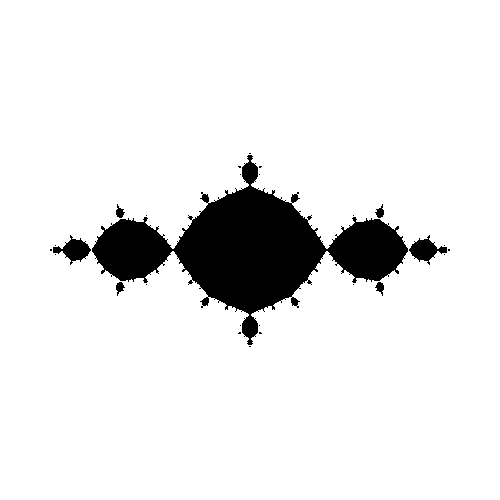

In [42]:
Image.fromarray(255*(1-orbit_classification.astype("uint8")),mode="L")

The filled Julia set of $g(z) = z^2-1$, often called "the basilica"